<a href="https://colab.research.google.com/github/joaovictordds/previsao_tractian/blob/main/tractian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autots

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from autots import AutoTS
import warnings
warnings.filterwarnings("ignore")
%load_ext scalene

Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
caminho = 'https://raw.githubusercontent.com/joaovictordds/previsao_tractian/main/dados_limpos.csv'
dados = pd.read_csv(caminho)
dados.drop(columns='Unnamed: 0', inplace=True)

In [4]:
dados['Order Date'] = pd.to_datetime(dados['Order Date'], format='%Y-%m-%d')
dados['Ship Date'] = pd.to_datetime(dados['Ship Date'], format='%Y-%m-%d')
dados.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,2017-11-08,2017-11-11,Second Class,0,Consumer,Henderson,Kentucky,South,0,Furniture,Bookcases,261.960,2.0,0.0,41.9136
1,1,2017-06-12,2017-06-16,Second Class,1,Corporate,Los Angeles,California,West,2,Office Supplies,Labels,14.620,2.0,0.0,6.8714
2,2,2016-10-11,2016-10-18,Standard Class,2,Consumer,Fort Lauderdale,Florida,South,4,Office Supplies,Storage,22.368,2.0,0.2,2.5164


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      7779 non-null   int64         
 1   Order Date    7779 non-null   datetime64[ns]
 2   Ship Date     7779 non-null   datetime64[ns]
 3   Ship Mode     7779 non-null   object        
 4   Customer ID   7779 non-null   int64         
 5   Segment       7779 non-null   object        
 6   City          7779 non-null   object        
 7   State         7779 non-null   object        
 8   Region        7779 non-null   object        
 9   Product ID    7779 non-null   int64         
 10  Category      7779 non-null   object        
 11  Sub-Category  7779 non-null   object        
 12  Sales         7779 non-null   float64       
 13  Quantity      7779 non-null   float64       
 14  Discount      7779 non-null   float64       
 15  Profit        7779 non-null   float64 

In [22]:
# Criando um range para as datas vazias
range = pd.date_range(start = '2015-01-03', end = '2018-12-30', freq='D').to_frame()
nome = ['data']
range.columns = nome
range.head(3)

,data
2015-01-03,2015-01-03
2015-01-04,2015-01-04
2015-01-05,2015-01-05


In [29]:
agrupado = dados.groupby('Order Date').sum().round(2)
agrupado['dataf'] = agrupado.index
agrupado.drop(columns=['Order ID', 'Customer ID',	'Product ID', 'Quantity',	'Discount',	'Profit'], inplace=True)
agrupado.head(3)

,Sales,dataf
Order Date,,
2015-01-03,16.45,2015-01-03
2015-01-04,11.78,2015-01-04
2015-01-05,19.54,2015-01-05


In [26]:
range.shape
agrupado.shape

(1204, 2)

In [36]:
df_col_merged = pd.concat([agrupado, range], axis=1)
df_col_merged.drop(columns='dataf', inplace=True)

In [37]:
df_col_merged.tail(3)

,Sales,data
2018-12-28,589.13,2018-12-28
2018-12-29,1104.43,2018-12-29
2018-12-30,713.79,2018-12-30


In [41]:
model = AutoTS(forecast_length=7, frequency='infer', ensemble='simple', drop_data_older_than_periods=1000)
model = model.fit(df_col_merged, date_col='data', value_col='Sales', id_col=None)
# Modelo de Regress
prediction = model.predict()
forecast = prediction.forecast

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model DatepartRegression in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Epoch 1/50
32/32 [==============================] - 4s 4ms/step - loss: 0.4156
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4057
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4010
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4020
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3984
Epoch 6/50
32/32 [==============================] - 0s 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model RollingRegression in generation 0 of 20
Model Number: 49 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 49: GluonTS
Model Number: 50 with model UnobservedComponents in generation 0 of 20
Model Number: 51 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 51: VAR
Model Number: 52 with model VECM in generation 0 of 20
Template Eval Error: ValueError('zero-size array to reduction operation maximum which has no identity') in model 52: VECM
Model Number: 53 with model WindowRegression in generation 0 of 20
Model Number: 54 with model DatepartRegression in generation 0 of 20
Model Number: 55 with model UnivariateRegression in generation 0 of 20
Template Eval Error: TypeError("'>' not supported between instances of 'NoneType' and 'int'") in model 55: UnivariateRegression
Model Number: 56 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 67 with model ZeroesNaive in generation 0 of 20
Model Number: 68 with model ETS in generation 0 of 20
Model Number: 69 with model AverageValueNaive in generation 0 of 20
Model Number: 70 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 70: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 20
Model Number: 72 with model FBProphet in generation 0 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 73 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 73: DatepartRegression
Model Number: 74 with model AverageValueNaive in generation 0 of 20
Model Number: 75 with model AverageValueNaive in generation 0 of 20
Model Number: 76 with model GLM in generation 0 of 20
Model Number: 77 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 77: VAR
Model Number: 78 with model UnobservedComponents in generation 0 of 20
Model Number: 79 with model DatepartRegression in generation 0 of 20
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 80 with model RollingRegression in generation 0 of 20
Model Number: 81 with model RollingRegression in generation 0 of 20
Model Number: 82 with model Univaria

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 84 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError('Data cardinality is ambiguous:\n  x sizes: 1688\n  y sizes: 844\nMake sure all arrays contain the same number of samples.') in model 84: DatepartRegression
Model Number: 85 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 85: VECM
Model Number: 86 with model RollingRegression in generation 0 of 20
Epoch 1/50
31/31 [==============================] - 5s 6ms/step - loss: nan
Epoch 2/50
31/31 [==============================] - 0s 6ms/step - loss: -0.4579
Epoch 3/50
31/31 [==============================] - 0s 6ms/step - loss: -1.8117
Epoch 4/50
31/31 [==============================] - 0s 7ms/step - loss: -4.8225
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: -11.5710
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: nan 
Epoch 7/50
31/31 [==============================] - 0s 7ms/st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 101 with model ZeroesNaive in generation 0 of 20
Model Number: 102 with model UnobservedComponents in generation 0 of 20
Model Number: 103 with model AverageValueNaive in generation 0 of 20
New Generation: 1 of 20
Model Number: 104 with model ETS in generation 1 of 20
Model Number: 105 with model ETS in generation 1 of 20
Model Number: 106 with model ETS in generation 1 of 20
Model Number: 107 with model ETS in generation 1 of 20
Model Number: 108 with model WindowRegression in generation 1 of 20
Model Number: 109 with model WindowRegression in generation 1 of 20
Template Eval Error: LightGBMError('Check failed: label > 0 at /__w/1/s/python-package/compile/src/metric/regression_metric.hpp, line 268 .\n') in model 109: WindowRegression
Model Number: 110 with model WindowRegression in generation 1 of 20
Template Eval Error: LightGBMError('Check failed: label > 0 at /__w/1/s/python-package/compile/src/metric/regression_metric.hpp, line 268 .\n') in model 110: WindowRegressio

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 125 with model FBProphet in generation 1 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 126 with model FBProphet in generation 1 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 127 with model FBProphet in generation 1 of 20
Model Number: 128 with model LastValueNaive in generation 1 of 20
Model Number: 129 with model LastValueNaive in generation 1 of 20
Model Number: 130 with model LastValueNaive in generation 1 of 20
Model Number: 131 with model RollingRegression in generation 1 of 20
Model Number: 132 with model RollingRegression in generation 1 of 20
Model Number: 133 with model RollingRegression in generation 1 of 20
Model Number: 134 with model RollingRegression in generation 1 of 20
Model Number: 135 with model GLS in generation 1 of 20
Model Number: 136 with model GLS in generation 1 of 20
Model Number: 137 with model GLS in generation 1 of 20
Model Number: 138 with model GLM in generation 1 of 20
Model Number: 139 with model GLM in generation 1 of 20
Model Number: 140 with model GLM in generation 1 of 20
Model Number: 141 with model GLM in generation 1 of 20
Model Number: 142 with model UnobservedComponents in generation 1 of 20
Model Nu

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 184 with model FBProphet in generation 2 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 185 with model FBProphet in generation 2 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 186 with model FBProphet in generation 2 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 187 with model FBProphet in generation 2 of 20
Model Number: 188 with model LastValueNaive in generation 2 of 20
Model Number: 189 with model LastValueNaive in generation 2 of 20
Model Number: 190 with model LastValueNaive in generation 2 of 20
Model Number: 191 with model GLS in generation 2 of 20
Model Number: 192 with model GLS in generation 2 of 20
Model Number: 193 with model GLS in generation 2 of 20
Model Number: 194 with model GLM in generation 2 of 20
Model Number: 195 with model GLM in generation 2 of 20
Model Number: 196 with model GLM in generation 2 of 20
Model Number: 197 with model GLM in generation 2 of 20
Model Number: 198 with model UnobservedComponents in generation 2 of 20
Model Number: 199 with model UnobservedComponents in generation 2 of 20
Model Number: 200 with model UnobservedComponents in generation 2 of 20
Model Number: 201 with model GluonTS in generation 2 of 20
Template Eval Error: ImportError('GluonTS installation not found or installed ver

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 233 with model FBProphet in generation 3 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 234 with model FBProphet in generation 3 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 235 with model FBProphet in generation 3 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 236 with model FBProphet in generation 3 of 20
Model Number: 237 with model RollingRegression in generation 3 of 20
Model Number: 238 with model RollingRegression in generation 3 of 20
Model Number: 239 with model RollingRegression in generation 3 of 20
Model Number: 240 with model RollingRegression in generation 3 of 20
Model Number: 241 with model ZeroesNaive in generation 3 of 20
Model Number: 242 with model ZeroesNaive in generation 3 of 20
Model Number: 243 with model ZeroesNaive in generation 3 of 20
Model Number: 244 with model LastValueNaive in generation 3 of 20
Model Number: 245 with model LastValueNaive in generation 3 of 20
Model Number: 246 with model GLS in generation 3 of 20
Model Number: 247 with model GLS in generation 3 of 20
Model Number: 248 with model GLS in generation 3 of 20
Model Number: 249 with model GLM in generation 3 of 20
Model Number: 250 with model GLM in generation 3 of 20
Model Number: 251 with model GLM in generation 3 of 20
Model Number

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 282 with model DatepartRegression in generation 4 of 20
Model Number: 283 with model LastValueNaive in generation 4 of 20
Model Number: 284 with model LastValueNaive in generation 4 of 20
Model Number: 285 with model AverageValueNaive in generation 4 of 20
Model Number: 286 with model AverageValueNaive in generation 4 of 20
Model Number: 287 with model FBProphet in generation 4 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 288 with model FBProphet in generation 4 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 289 with model FBProphet in generation 4 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 290 with model FBProphet in generation 4 of 20
Model Number: 291 with model RollingRegression in generation 4 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 292 with model RollingRegression in generation 4 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 293 with model RollingRegression in generation 4 of 20
Model Number: 294 with model RollingRegression in generation 4 of 20
Model Number: 295 with model ZeroesNaive in generation 4 of 20
Model Number: 296 with model ZeroesNaive in generation 4 of 20
Model Number: 297 with model ZeroesNaive in generation 4 of 20
Model Number: 298 with model GLS in generation 4 of 20
Model Number: 299 with model GLS in generation 4 of 20
Model Number: 300 with model GLS in generation 4 of 20
Model Number: 301 with model GLM in generation 4 of 20
Model Number: 302 with model GLM in generation 4 of 20
Model Number: 303 with model GLM in generation 4 of 20
Model Number: 304 with model GLM in generation 4 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 304: GLM
Model Number: 305 with model UnobservedComponents in generation 4 of 20
Model Number: 306 with model UnobservedComponents in generation 4 of 20
Model Number: 307 wit

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 344 with model FBProphet in generation 5 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 345 with model FBProphet in generation 5 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 346 with model FBProphet in generation 5 of 20
Model Number: 347 with model RollingRegression in generation 5 of 20
Model Number: 348 with model RollingRegression in generation 5 of 20
Model Number: 349 with model RollingRegression in generation 5 of 20
Model Number: 350 with model RollingRegression in generation 5 of 20
Model Number: 351 with model GLS in generation 5 of 20
Model Number: 352 with model GLS in generation 5 of 20
Model Number: 353 with model GLS in generation 5 of 20
Model Number: 354 with model ZeroesNaive in generation 5 of 20
Model Number: 355 with model ZeroesNaive in generation 5 of 20
Model Number: 356 with model UnobservedComponents in generation 5 of 20
Model Number: 357 with model UnobservedComponents in generation 5 of 20
Model Number: 358 with model UnobservedComponents in generation 5 of 20
Model Number: 359 with model GLM in generation 5 of 20
Model Number: 360 with model GLM in generation 5 of 20
Model Number: 361 with model GLM in generation

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 393 with model FBProphet in generation 6 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 394 with model FBProphet in generation 6 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 395 with model FBProphet in generation 6 of 20
Model Number: 396 with model LastValueNaive in generation 6 of 20
Model Number: 397 with model LastValueNaive in generation 6 of 20
Model Number: 398 with model AverageValueNaive in generation 6 of 20
Model Number: 399 with model AverageValueNaive in generation 6 of 20
Model Number: 400 with model AverageValueNaive in generation 6 of 20
Model Number: 401 with model RollingRegression in generation 6 of 20
Model Number: 402 with model RollingRegression in generation 6 of 20
Model Number: 403 with model RollingRegression in generation 6 of 20
Model Number: 404 with model RollingRegression in generation 6 of 20
Model Number: 405 with model GLS in generation 6 of 20
Model Number: 406 with model GLS in generation 6 of 20
Model Number: 407 with model ZeroesNaive in generation 6 of 20
Model Number: 408 with model ZeroesNaive in generation 6 of 20
Model Number: 409 with model UnobservedComponents in generation 6 of 20
Model Number: 41

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 447 with model FBProphet in generation 7 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 448 with model FBProphet in generation 7 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 449 with model FBProphet in generation 7 of 20
Model Number: 450 with model LastValueNaive in generation 7 of 20
Model Number: 451 with model LastValueNaive in generation 7 of 20
Model Number: 452 with model AverageValueNaive in generation 7 of 20
Model Number: 453 with model AverageValueNaive in generation 7 of 20
Model Number: 454 with model AverageValueNaive in generation 7 of 20
Model Number: 455 with model RollingRegression in generation 7 of 20
Model Number: 456 with model RollingRegression in generation 7 of 20
Model Number: 457 with model RollingRegression in generation 7 of 20
Model Number: 458 with model RollingRegression in generation 7 of 20
Model Number: 459 with model GLS in generation 7 of 20
Model Number: 460 with model GLS in generation 7 of 20
Model Number: 461 with model ZeroesNaive in generation 7 of 20
Model Number: 462 with model ZeroesNaive in generation 7 of 20
Model Number: 463 with model UnobservedComponents in generation 7 of 20
Model Number: 46

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 504 with model FBProphet in generation 8 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 505 with model FBProphet in generation 8 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 506 with model FBProphet in generation 8 of 20
Model Number: 507 with model LastValueNaive in generation 8 of 20
Model Number: 508 with model LastValueNaive in generation 8 of 20
Model Number: 509 with model UnobservedComponents in generation 8 of 20
Model Number: 510 with model UnobservedComponents in generation 8 of 20
Model Number: 511 with model UnobservedComponents in generation 8 of 20
Model Number: 512 with model RollingRegression in generation 8 of 20
Model Number: 513 with model RollingRegression in generation 8 of 20
Model Number: 514 with model RollingRegression in generation 8 of 20
Model Number: 515 with model RollingRegression in generation 8 of 20
Model Number: 516 with model GLS in generation 8 of 20
Model Number: 517 with model GLS in generation 8 of 20
Model Number: 518 with model GLS in generation 8 of 20
Model Number: 519 with model ZeroesNaive in generation 8 of 20
Model Number: 520 with model ZeroesNaive in generation 8 of 20
Model Number: 521 with m

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 556 with model FBProphet in generation 9 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 557 with model FBProphet in generation 9 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 558 with model FBProphet in generation 9 of 20
Model Number: 559 with model LastValueNaive in generation 9 of 20
Model Number: 560 with model LastValueNaive in generation 9 of 20
Model Number: 561 with model UnobservedComponents in generation 9 of 20
Model Number: 562 with model UnobservedComponents in generation 9 of 20
Model Number: 563 with model UnobservedComponents in generation 9 of 20
Model Number: 564 with model RollingRegression in generation 9 of 20
Model Number: 565 with model RollingRegression in generation 9 of 20
Model Number: 566 with model RollingRegression in generation 9 of 20
Model Number: 567 with model RollingRegression in generation 9 of 20
Model Number: 568 with model GLS in generation 9 of 20
Model Number: 569 with model GLS in generation 9 of 20
Model Number: 570 with model GLS in generation 9 of 20
Model Number: 571 with model ZeroesNaive in generation 9 of 20
Model Number: 572 with model ZeroesNaive in generation 9 of 20
Model Number: 573 with m

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series') in model 606: DatepartRegression
Model Number: 607 with model DatepartRegression in generation 10 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 607: DatepartRegression
Model Number: 608 with model DatepartRegression in generation 10 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 608: DatepartRegression
Model Number: 609 with model FBProphet in generation 10 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 610 with model FBProphet in generation 10 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 611 with model FBProphet in generation 10 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 612 with model FBProphet in generation 10 of 20
Model Number: 613 with model RollingRegression in generation 10 of 20
Model Number: 614 with model RollingRegression in generation 10 of 20
Model Number: 615 with model RollingRegression in generation 10 of 20
Model Number: 616 with model RollingRegression in generation 10 of 20
Epoch 1/50
14/14 [==============================] - 4s 5ms/step - loss: 0.1188
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0944
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0933
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0875
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0876
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0881
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0865
Epoch 9/50
14/14 [========

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 647 with model DatepartRegression in generation 11 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 647: DatepartRegression
Model Number: 648 with model FBProphet in generation 11 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 649 with model FBProphet in generation 11 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 650 with model FBProphet in generation 11 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 651 with model FBProphet in generation 11 of 20
Model Number: 652 with model LastValueNaive in generation 11 of 20
Model Number: 653 with model LastValueNaive in generation 11 of 20
Model Number: 654 with model LastValueNaive in generation 11 of 20
Model Number: 655 with model UnobservedComponents in generation 11 of 20
Model Number: 656 with model UnobservedComponents in generation 11 of 20
Model Number: 657 with model UnobservedComponents in generation 11 of 20
Model Number: 658 with model GLS in generation 11 of 20
Model Number: 659 with model GLS in generation 11 of 20
Model Number: 660 with model GLS in generation 11 of 20
Model Number: 661 with model ZeroesNaive in generation 11 of 20
Model Number: 662 with model ZeroesNaive in generation 11 of 20
New Generation: 12 of 20
Model Number: 663 with model RollingRegression in generation 12 of 20
Model Number: 664 with model RollingRegression in generation 12 of 20
Model Number: 665 with model RollingRegression in generat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 682 with model DatepartRegression in generation 12 of 20
Model Number: 683 with model FBProphet in generation 12 of 20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 684 with model FBProphet in generation 12 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 685 with model FBProphet in generation 12 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 686 with model FBProphet in generation 12 of 20
Model Number: 687 with model LastValueNaive in generation 12 of 20
Model Number: 688 with model LastValueNaive in generation 12 of 20
Model Number: 689 with model UnobservedComponents in generation 12 of 20
Model Number: 690 with model UnobservedComponents in generation 12 of 20
Model Number: 691 with model UnobservedComponents in generation 12 of 20
Model Number: 692 with model GLS in generation 12 of 20
Model Number: 693 with model GLS in generation 12 of 20
Model Number: 694 with model ZeroesNaive in generation 12 of 20
Model Number: 695 with model ZeroesNaive in generation 12 of 20
Model Number: 696 with model ZeroesNaive in generation 12 of 20
New Generation: 13 of 20
Model Number: 697 with model RollingRegression in generation 13 of 20
Model Number: 698 with model RollingRegression in generation 13 of 20
Model Number: 699 with model RollingRegression in generation 13 of 20
Model Number: 700 with model RollingRegression

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 716 with model DatepartRegression in generation 13 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 716: DatepartRegression
Model Number: 717 with model DatepartRegression in generation 13 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 717: DatepartRegression
Model Number: 718 with model FBProphet in generation 13 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 719 with model FBProphet in generation 13 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 720 with model FBProphet in generation 13 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 721 with model FBProphet in generation 13 of 20
Model Number: 722 with model LastValueNaive in generation 13 of 20
Model Number: 723 with model LastValueNaive in generation 13 of 20
Model Number: 724 with model UnobservedComponents in generation 13 of 20
Model Number: 725 with model UnobservedComponents in generation 13 of 20
Model Number: 726 with model UnobservedComponents in generation 13 of 20
Model Number: 727 with model GLS in generation 13 of 20
Model Number: 728 with model GLS in generation 13 of 20
Model Number: 729 with model GLS in generation 13 of 20
Model Number: 730 with model ZeroesNaive in generation 13 of 20
Model Number: 731 with model ZeroesNaive in generation 13 of 20
Model Number: 732 with model ZeroesNaive in generation 13 of 20
New Generation: 14 of 20
Model Number: 733 with model WindowRegression in generation 14 of 20
Model Number: 734 with model WindowRegression in generation 14 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 735 with model WindowRegression in generation 14 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 735: WindowRegression
Model Number: 736 with model RollingRegression in generation 14 of 20
Model Number: 737 with model RollingRegression in generation 14 of 20
Model Number: 738 with model RollingRegression in generation 14 of 20
Model Number: 739 with model RollingRegression in generation 14 of 20
Model Number: 740 with model ETS in generation 14 of 20
Model Number: 741 with model ETS in generation 14 of 20
Model Number: 742 with model ETS in generation 14 of 20
Model Number: 743 with model ETS in generation 14 of 20
Model Number: 744 with model AverageValueNaive in generation 14 of 20
Model Number: 745 with model AverageValueNaive in generation 14 of 20
Model Number: 746 with model AverageValueNaive in generation 14 of 20
Model Number: 747 with model SeasonalNaive in generation 14 of 20
Model Number:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 754 with model FBProphet in generation 14 of 20
Model Number: 755 with model LastValueNaive in generation 14 of 20
Model Number: 756 with model LastValueNaive in generation 14 of 20
Model Number: 757 with model LastValueNaive in generation 14 of 20
Model Number: 758 with model UnobservedComponents in generation 14 of 20
Model Number: 759 with model UnobservedComponents in generation 14 of 20
Model Number: 760 with model UnobservedComponents in generation 14 of 20
Model Number: 761 with model GLS in generation 14 of 20
Model Number: 762 with model GLS in generation 14 of 20
Model Number: 763 with model ZeroesNaive in generation 14 of 20
Model Number: 764 with model ZeroesNaive in generation 14 of 20
New Generation: 15 of 20
Model Number: 765 with model WindowRegression in generation 15 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 765: WindowRegression
Model Number: 766 with model WindowRegression 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 785: DatepartRegression
Model Number: 786 with model FBProphet in generation 15 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 787 with model FBProphet in generation 15 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 788 with model FBProphet in generation 15 of 20
Model Number: 789 with model LastValueNaive in generation 15 of 20
Model Number: 790 with model LastValueNaive in generation 15 of 20
Model Number: 791 with model UnobservedComponents in generation 15 of 20
Model Number: 792 with model UnobservedComponents in generation 15 of 20
Model Number: 793 with model UnobservedComponents in generation 15 of 20
Model Number: 794 with model GLS in generation 15 of 20
Model Number: 795 with model GLS in generation 15 of 20
Model Number: 796 with model GLS in generation 15 of 20
New Generation: 16 of 20
Model Number: 797 with model WindowRegression in generation 16 of 20
Epoch 1/50
31/31 [==============================] - 2s 4ms/step - loss: 0.0438
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0383
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 5

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 821 with model FBProphet in generation 16 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 822 with model FBProphet in generation 16 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 823 with model FBProphet in generation 16 of 20
Model Number: 824 with model LastValueNaive in generation 16 of 20
Model Number: 825 with model LastValueNaive in generation 16 of 20
Model Number: 826 with model LastValueNaive in generation 16 of 20
Model Number: 827 with model UnobservedComponents in generation 16 of 20
Model Number: 828 with model UnobservedComponents in generation 16 of 20
Model Number: 829 with model UnobservedComponents in generation 16 of 20
New Generation: 17 of 20
Model Number: 830 with model WindowRegression in generation 17 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 830: WindowRegression
Model Number: 831 with model WindowRegression in generation 17 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 831: WindowRegression
Model Number: 832 with model WindowRegression in generation 17 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 833 with model AverageValueNaive in generation 17 of 20
Model Number: 834 with model AverageValueNaive in generation 17 of 20


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 835 with model AverageValueNaive in generation 17 of 20
Model Number: 836 with model RollingRegression in generation 17 of 20
Model Number: 837 with model RollingRegression in generation 17 of 20
Model Number: 838 with model RollingRegression in generation 17 of 20
Model Number: 839 with model RollingRegression in generation 17 of 20
Model Number: 840 with model GLS in generation 17 of 20
Model Number: 841 with model GLS in generation 17 of 20
Model Number: 842 with model GLS in generation 17 of 20
Model Number: 843 with model ETS in generation 17 of 20
Model Number: 844 with model ETS in generation 17 of 20
Model Number: 845 with model ETS in generation 17 of 20
Model Number: 846 with model ETS in generation 17 of 20
Model Number: 847 with model SeasonalNaive in generation 17 of 20
Model Number: 848 with model SeasonalNaive in generation 17 of 20
Model Number: 849 with model SeasonalNaive in generation 17 of 20
Model Number: 850 with model SeasonalNaive in generation 17 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 858 with model FBProphet in generation 17 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 859 with model FBProphet in generation 17 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 860 with model FBProphet in generation 17 of 20
Model Number: 861 with model UnobservedComponents in generation 17 of 20
Model Number: 862 with model UnobservedComponents in generation 17 of 20
Model Number: 863 with model UnobservedComponents in generation 17 of 20
New Generation: 18 of 20
Model Number: 864 with model WindowRegression in generation 18 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 864: WindowRegression
Model Number: 865 with model WindowRegression in generation 18 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 866 with model WindowRegression in generation 18 of 20
Model Number: 867 with model GLS in generation 18 of 20
Model Number: 868 with model GLS in generation 18 of 20
Model Number: 869 with model AverageValueNaive in generation 18 of 20
Model Number: 870 with model AverageValueNaive in generation 18 of 20
Model Number: 871 with model RollingRegression in generation 18 of 20
Model Number: 872 with model RollingRegression in generation 18 of 20
Model Number: 873 with model RollingRegression in generation 18 of 20
Model Number: 874 with model RollingRegression in generation 18 of 20
Model Number: 875 with model ETS in generation 18 of 20
Model Number: 876 with model ETS in generation 18 of 20
Model Number: 877 with model ETS in generation 18 of 20
Model Number: 878 with model SeasonalNaive in generation 18 of 20
Model Number: 879 with model SeasonalNaive in generation 18 of 20
Model Number: 880 with model SeasonalNaive in generation 18 of 20
Model Number: 881 with model Seas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 887 with model FBProphet in generation 18 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 888 with model FBProphet in generation 18 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 889 with model FBProphet in generation 18 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 890 with model FBProphet in generation 18 of 20
Model Number: 891 with model UnobservedComponents in generation 18 of 20
Model Number: 892 with model UnobservedComponents in generation 18 of 20
Model Number: 893 with model UnobservedComponents in generation 18 of 20
New Generation: 19 of 20
Model Number: 894 with model WindowRegression in generation 19 of 20
Model Number: 895 with model WindowRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 896 with model WindowRegression in generation 19 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 896: WindowRegression
Model Number: 897 with model GLS in generation 19 of 20
Model Number: 898 with model GLS in generation 19 of 20
Model Number: 899 with model GLS in generation 19 of 20
Model Number: 900 with model AverageValueNaive in generation 19 of 20
Model Number: 901 with model AverageValueNaive in generation 19 of 20
Model Number: 902 with model RollingRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 903 with model RollingRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 904 with model RollingRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Model Number: 905 with model RollingRegression in generation 19 of 20
Model Number: 906 with model DatepartRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 907 with model DatepartRegression in generation 19 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 908 with model DatepartRegression in generation 19 of 20
Model Number: 909 with model ETS in generation 19 of 20
Model Number: 910 with model ETS in generation 19 of 20
Model Number: 911 with model ETS in generation 19 of 20
Model Number: 912 with model ETS in generation 19 of 20
Model Number: 913 with model SeasonalNaive in generation 19 of 20
Model Number: 914 with model SeasonalNaive in generation 19 of 20
Model Number: 915 with model SeasonalNaive in generation 19 of 20
Model Number: 916 with model SeasonalNaive in generation 19 of 20
Model Number: 917 with model LastValueNaive in generation 19 of 20
Model Number: 918 with model LastValueNaive in generation 19 of 20
Model Number: 919 with model FBProphet in generation 19 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 920 with model FBProphet in generation 19 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 921 with model FBProphet in generation 19 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 922 with model FBProphet in generation 19 of 20
Model Number: 923 with model UnobservedComponents in generation 19 of 20
Model Number: 924 with model UnobservedComponents in generation 19 of 20
Model Number: 925 with model UnobservedComponents in generation 19 of 20
New Generation: 20 of 20
Model Number: 926 with model WindowRegression in generation 20 of 20
Model Number: 927 with model WindowRegression in generation 20 of 20
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 927: WindowRegression
Model Number: 928 with model WindowRegression in generation 20 of 20
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.6093
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5907
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5686
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5532
Epoch 5/100
20/20 [==========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 939 with model DatepartRegression in generation 20 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 940 with model ETS in generation 20 of 20
Model Number: 941 with model ETS in generation 20 of 20
Model Number: 942 with model ETS in generation 20 of 20
Model Number: 943 with model ETS in generation 20 of 20
Model Number: 944 with model SeasonalNaive in generation 20 of 20
Model Number: 945 with model SeasonalNaive in generation 20 of 20
Model Number: 946 with model SeasonalNaive in generation 20 of 20
Model Number: 947 with model SeasonalNaive in generation 20 of 20
Model Number: 948 with model LastValueNaive in generation 20 of 20
Model Number: 949 with model LastValueNaive in generation 20 of 20
Model Number: 950 with model FBProphet in generation 20 of 20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 951 with model FBProphet in generation 20 of 20
Model Number: 952 with model UnobservedComponents in generation 20 of 20
Model Number: 953 with model UnobservedComponents in generation 20 of 20
Model Number: 954 with model UnobservedComponents in generation 20 of 20
Model Number: 955 with model Ensemble in generation 0 of 0
Model Number: 956 with model Ensemble in generation 0 of 0
Model Number: 957 with model Ensemble in generation 0 of 0
Validation Round: 1
Model Number: 1 of 123 with model WindowRegression for Validation 1
Model 1 of model WindowRegression with avg smape 90.01: 
Model Number: 2 of 123 with model Ensemble for Validation 1
Model 2 of model Ensemble with avg smape 92.36: 
Model Number: 3 of 123 with model Ensemble for Validation 1
Model 3 of model Ensemble with avg smape 92.36: 
Model Number: 4 of 123 with model GLS for Validation 1
Model 4 of model GLS with avg smape 93.39: 
Model Number: 5 of 123 with model AverageValueNaive for Validation 1
Model 5 of 

Model 19 of model DatepartRegression with avg smape 91.63: 
Model Number: 20 of 123 with model AverageValueNaive for Validation 1
Model 20 of model AverageValueNaive with avg smape 103.1: 
Model Number: 21 of 123 with model ETS for Validation 1
Model 21 of model ETS with avg smape 74.14: 
Model Number: 22 of 123 with model ETS for Validation 1
Model 22 of model ETS with avg smape 74.62: 
Model Number: 23 of 123 with model ETS for Validation 1
Model 23 of model ETS with avg smape 74.62: 
Model Number: 24 of 123 with model ETS for Validation 1
Model 24 of model ETS with avg smape 74.01: 
Model Number: 25 of 123 with model ETS for Validation 1
Model 25 of model ETS with avg smape 74.34: 
Model Number: 26 of 123 with model ETS for Validation 1
Model 26 of model ETS with avg smape 74.34: 
Model Number: 27 of 123 with model ETS for Validation 1
Model 27 of model ETS with avg smape 68.8: 
Model Number: 28 of 123 with model AverageValueNaive for Validation 1
Model 28 of model AverageValueNaive

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 47 of model DatepartRegression with avg smape 66.29: 
Model Number: 48 of 123 with model SeasonalNaive for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 48 of model SeasonalNaive with avg smape 71.38: 
Model Number: 49 of 123 with model FBProphet for Validation 1
Model 49 of model FBProphet with avg smape 74.47: 
Model Number: 50 of 123 with model WindowRegression for Validation 1
Epoch 1/100
20/20 [==============================] - 5s 6ms/step - loss: 0.6108
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5926
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5717
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5564
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5438
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5332
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5212
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5094
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4980
Epoch 10/100
20/20 [=======================

Model 50 of model WindowRegression with avg smape 89.19: 
Model Number: 51 of 123 with model SeasonalNaive for Validation 1
Model 51 of model SeasonalNaive with avg smape 71.89: 
Model Number: 52 of 123 with model RollingRegression for Validation 1
Model 52 of model RollingRegression with avg smape 76.14: 
Model Number: 53 of 123 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 53 of model FBProphet with avg smape 74.44: 
Model Number: 54 of 123 with model SeasonalNaive for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 54 of model SeasonalNaive with avg smape 57.6: 
Model Number: 55 of 123 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 55 of model FBProphet with avg smape 79.14: 
Model Number: 56 of 123 with model FBProphet for Validation 1
Model 56 of model FBProphet with avg smape 74.53: 
Model Number: 57 of 123 with model RollingRegression for Validation 1
Model 57 of model RollingRegression with avg smape 84.09: 
Model Number: 58 of 123 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 58 of model FBProphet with avg smape 74.54: 
Model Number: 59 of 123 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 59 of model FBProphet with avg smape 74.39: 
Model Number: 60 of 123 with model FBProphet for Validation 1
Model 60 of model FBProphet with avg smape 74.39: 
Model Number: 61 of 123 with model WindowRegression for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 61 of model WindowRegression with avg smape 77.14: 
Model Number: 62 of 123 with model FBProphet for Validation 1
Model 62 of model FBProphet with avg smape 74.5: 
Model Number: 63 of 123 with model ETS for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model ETS returned NaN for one or more series') in model 63: ETS
Model Number: 64 of 123 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 64 of model FBProphet with avg smape 74.43: 
Model Number: 65 of 123 with model FBProphet for Validation 1
Model 65 of model FBProphet with avg smape 74.43: 
Model Number: 66 of 123 with model WindowRegression for Validation 1
Model 66 of model WindowRegression with avg smape 68.4: 
Model Number: 67 of 123 with model DatepartRegression for Validation 1
Model 67 of model DatepartRegression with avg smape 56.44: 
Model Number: 68 of 123 with model WindowRegression for Validation 1
Model 68 of model WindowRegression with avg smape 87.39: 
Model Number: 69 of 123 with model UnobservedComponents for Validation 1
Model 69 of model UnobservedComponents with avg smape 79.09: 
Model Number: 70 of 123 with model LastValueNaive for Validation 1
Model 70 of model LastValueNaive with avg smape 79.11: 
Model Number: 71 of 123 with model UnobservedComponents for Validation 1
Model 71 of model UnobservedComponents with avg smape 79.09: 
Model Number: 72 of 123 with model WindowRegression for Val

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model 72 of model WindowRegression with avg smape 72.8: 
Model Number: 73 of 123 with model LastValueNaive for Validation 1
Model 73 of model LastValueNaive with avg smape 74.24: 
Model Number: 74 of 123 with model LastValueNaive for Validation 1
Model 74 of model LastValueNaive with avg smape 90.87: 
Model Number: 75 of 123 with model UnobservedComponents for Validation 1


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 75 of model UnobservedComponents with avg smape 79.47: 
Model Number: 76 of 123 with model DatepartRegression for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 76 of model DatepartRegression with avg smape 68.3: 
Model Number: 77 of 123 with model DatepartRegression for Validation 1
Model 77 of model DatepartRegression with avg smape 66.25: 
Model Number: 78 of 123 with model UnobservedComponents for Validation 1
Model 78 of model UnobservedComponents with avg smape 79.47: 
Model Number: 79 of 123 with model LastValueNaive for Validation 1
Model 79 of model LastValueNaive with avg smape 91.2: 
Model Number: 80 of 123 with model GLS for Validation 1
Model 80 of model GLS with avg smape 68.32: 
Model Number: 81 of 123 with model GLS for Validation 1
Model 81 of model GLS with avg smape 68.48: 
Model Number: 82 of 123 with model LastValueNaive for Validation 1
Model 82 of model LastValueNaive with avg smape 81.68: 
Model Number: 83 of 123 with model LastValueNaive for Validation 1
Model 83 of model LastValueNaive with avg smape 81.68: 
Model Number: 84 of 123 with model LastValueNaive for Validation 1
Model 84 of model LastValueNaive with 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 94 of model DatepartRegression with avg smape 82.56: 
Model Number: 95 of 123 with model GLS for Validation 1
Model 95 of model GLS with avg smape 69.27: 
Model Number: 96 of 123 with model GLS for Validation 1
Model 96 of model GLS with avg smape 70.27: 
Model Number: 97 of 123 with model DatepartRegression for Validation 1
Model 97 of model DatepartRegression with avg smape 79.77: 
Model Number: 98 of 123 with model ZeroesNaive for Validation 1
Model 98 of model ZeroesNaive with avg smape 81.68: 
Model Number: 99 of 123 with model ZeroesNaive for Validation 1
Model 99 of model ZeroesNaive with avg smape 81.68: 
Model Number: 100 of 123 with model ZeroesNaive for Validation 1
Model 100 of model ZeroesNaive with avg smape 81.68: 
Model Number: 101 of 123 with model ZeroesNaive for Validation 1
Model 101 of model ZeroesNaive with avg smape 81.68: 
Model Number: 102 of 123 with model ZeroesNaive for Validation 1
Model 102 of model ZeroesNaive with avg smape 81.68: 
Model Number: 10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 47 of model DatepartRegression with avg smape 63.51: 
Model Number: 48 of 123 with model SeasonalNaive for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 48 of model SeasonalNaive with avg smape 80.59: 
Model Number: 49 of 123 with model FBProphet for Validation 2
Model 49 of model FBProphet with avg smape 37.93: 
Model Number: 50 of 123 with model WindowRegression for Validation 2
Epoch 1/100
20/20 [==============================] - 6s 7ms/step - loss: 0.6103
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5939
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5738
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5588
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5476
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5371
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5255
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5133
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5006
Epoch 10/100
20/20 [=======================

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 53 of model FBProphet with avg smape 37.53: 
Model Number: 54 of 123 with model SeasonalNaive for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 54 of model SeasonalNaive with avg smape 29.48: 
Model Number: 55 of 123 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 55 of model FBProphet with avg smape 44.18: 
Model Number: 56 of 123 with model FBProphet for Validation 2
Model 56 of model FBProphet with avg smape 37.18: 
Model Number: 57 of 123 with model RollingRegression for Validation 2
Model 57 of model RollingRegression with avg smape 89.74: 
Model Number: 58 of 123 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 58 of model FBProphet with avg smape 37.25: 
Model Number: 59 of 123 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 59 of model FBProphet with avg smape 36.86: 
Model Number: 60 of 123 with model FBProphet for Validation 2
Model 60 of model FBProphet with avg smape 36.86: 
Model Number: 61 of 123 with model WindowRegression for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 61 of model WindowRegression with avg smape 47.31: 
Model Number: 62 of 123 with model FBProphet for Validation 2
Model 62 of model FBProphet with avg smape 37.2: 
Model Number: 63 of 123 with model ETS for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 63 of model ETS with avg smape 51.9: 
Model Number: 64 of 123 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model 64 of model FBProphet with avg smape 36.99: 
Model Number: 65 of 123 with model FBProphet for Validation 2
Model 65 of model FBProphet with avg smape 36.99: 
Model Number: 66 of 123 with model WindowRegression for Validation 2
Model 66 of model WindowRegression with avg smape 48.85: 
Model Number: 67 of 123 with model DatepartRegression for Validation 2
Model 67 of model DatepartRegression with avg smape 41.78: 
Model Number: 68 of 123 with model WindowRegression for Validation 2
Model 68 of model WindowRegression with avg smape 19.91: 
Model Number: 69 of 123 with model UnobservedComponents for Validation 2
Model 69 of model UnobservedComponents with avg smape 52.0: 
Model Number: 70 of 123 with model LastValueNaive for Validation 2
Model 70 of model LastValueNaive with avg smape 85.77: 
Model Number: 71 of 123 with model UnobservedComponents for Validation 2
Model 71 of model UnobservedComponents with avg smape 52.0: 
Model Number: 72 of 123 with model WindowRegression for Vali

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model 72 of model WindowRegression with avg smape 71.27: 
Model Number: 73 of 123 with model LastValueNaive for Validation 2
Model 73 of model LastValueNaive with avg smape 61.95: 
Model Number: 74 of 123 with model LastValueNaive for Validation 2
Model 74 of model LastValueNaive with avg smape 77.94: 
Model Number: 75 of 123 with model UnobservedComponents for Validation 2


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 75 of model UnobservedComponents with avg smape 52.0: 
Model Number: 76 of 123 with model DatepartRegression for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 76 of model DatepartRegression with avg smape 41.38: 
Model Number: 77 of 123 with model DatepartRegression for Validation 2
Model 77 of model DatepartRegression with avg smape 32.88: 
Model Number: 78 of 123 with model UnobservedComponents for Validation 2
Model 78 of model UnobservedComponents with avg smape 52.0: 
Model Number: 79 of 123 with model LastValueNaive for Validation 2
Model 79 of model LastValueNaive with avg smape 86.58: 
Model Number: 80 of 123 with model GLS for Validation 2
Model 80 of model GLS with avg smape 28.83: 
Model Number: 81 of 123 with model GLS for Validation 2
Model 81 of model GLS with avg smape 30.53: 
Model Number: 82 of 123 with model LastValueNaive for Validation 2
Model 82 of model LastValueNaive with avg smape 86.58: 
Model Number: 83 of 123 with model LastValueNaive for Validation 2
Model 83 of model LastValueNaive with avg smape 86.58: 
Model Number: 84 of 123 with model LastValueNaive for Validation 2
Model 84 of model LastValueNaive with

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model 94 of model DatepartRegression with avg smape 49.95: 
Model Number: 95 of 123 with model GLS for Validation 2


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model 95 of model GLS with avg smape 28.54: 
Model Number: 96 of 123 with model GLS for Validation 2
Model 96 of model GLS with avg smape 28.49: 
Model Number: 97 of 123 with model DatepartRegression for Validation 2
Model 97 of model DatepartRegression with avg smape 28.48: 
Model Number: 98 of 123 with model ZeroesNaive for Validation 2
Model 98 of model ZeroesNaive with avg smape 86.58: 
Model Number: 99 of 123 with model ZeroesNaive for Validation 2
Model 99 of model ZeroesNaive with avg smape 86.58: 
Model Number: 100 of 123 with model ZeroesNaive for Validation 2
Model 100 of model ZeroesNaive with avg smape 86.58: 
Model Number: 101 of 123 with model ZeroesNaive for Validation 2
Model 101 of model ZeroesNaive with avg smape 86.58: 
Model Number: 102 of 123 with model ZeroesNaive for Validation 2
Model 102 of model ZeroesNaive with avg smape 86.58: 
Model Number: 103 of 123 with model ZeroesNaive for Validation 2
Model 103 of model ZeroesNaive with avg smape 86.58: 
Model Number:

In [44]:
df_col_merged.tail(7)

,Sales,data
2018-12-24,1027.14,2018-12-24
2018-12-25,1673.72,2018-12-25
2018-12-26,63.91,2018-12-26
2018-12-27,13.25,2018-12-27
2018-12-28,589.13,2018-12-28
2018-12-29,1104.43,2018-12-29
2018-12-30,713.79,2018-12-30


In [47]:
forecast

,Sales
2018-12-31,569.931971
2019-01-01,772.967878
2019-01-02,442.010835
2019-01-03,27.977766
2019-01-04,399.155684
2019-01-05,442.483878
2019-01-06,564.139471


In [67]:
plot = pd.DataFrame(forecast.round(2))
plot['Data'] = plot.index
plot

,Sales,Data
2018-12-31,569.93,2018-12-31
2019-01-01,772.97,2019-01-01
2019-01-02,442.01,2019-01-02
2019-01-03,27.98,2019-01-03
2019-01-04,399.16,2019-01-04
2019-01-05,442.48,2019-01-05
2019-01-06,564.14,2019-01-06


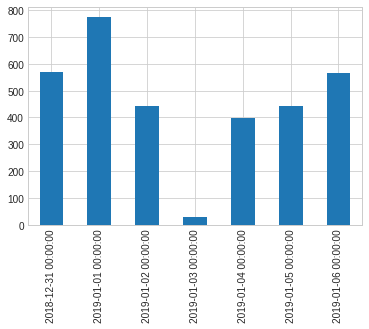

In [69]:
plot.Sales.plot(kind='bar');

In [46]:
forecast.round(2).to_csv('previsao7dias.csv')